### Grid based-filter design


In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from pytspl import load_dataset, SCPlot

sc, coordinates, flow = load_dataset("paper")
# create a plot
scplot = SCPlot(sc, coordinates)

Num. of nodes: 7
Num. of edges: 10
Num. of triangles: 3
Shape: (7, 10, 3)
Max Dimension: 2
Coordinates: 7
Flow: 10


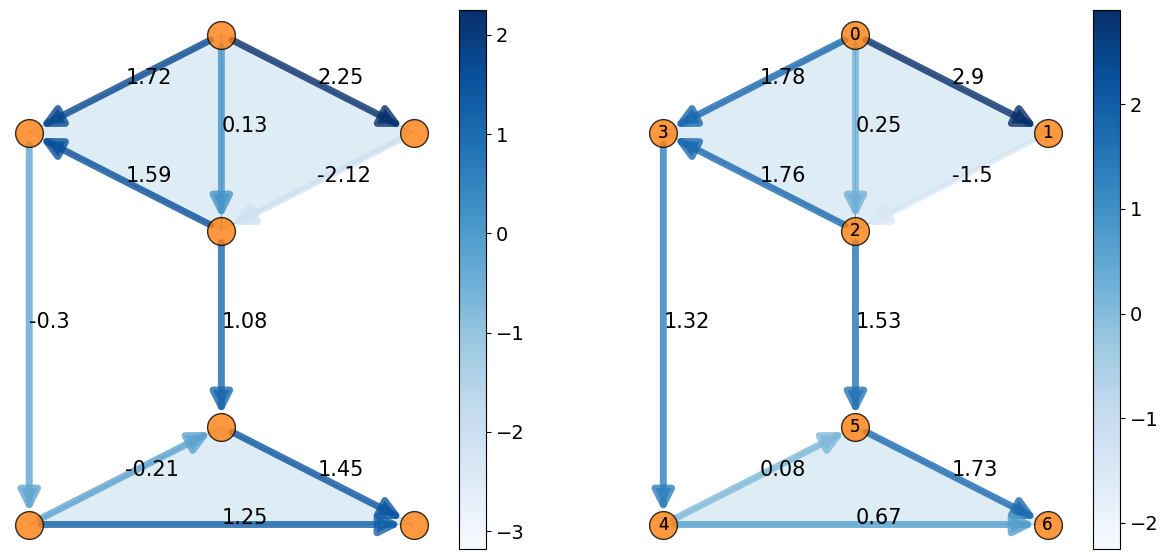

In [40]:
#f0 = np.array([-0.0689, -0.1378, 0.2067, -0.0689, 0.3445, -0.5512, 0.5512, 0.3675, 0.1837, -0.1837])
#f = np.array([-0.1711, -0.3792, 0.5259, 0.2440, -0.5204, -0.5812, 0.3863, 0.9952, 1.2770, 0.9255])

f0 = np.asarray(list(flow.values()))
f = [2.90, 0.25, 1.78, -1.50, 1.76, 1.53, 1.32,  0.08, 0.67, 1.73]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
scplot.draw_network(edge_flow=f0, ax=ax1)
scplot.draw_network(edge_flow=f , ax=ax2)

In [42]:
from pytspl.filters import GridBasedFilterDesign

gbf = GridBasedFilterDesign(simplicial_complex=sc)

#### Denoising

mu: 0.5, error: 0.7023925539678443
Filter size: 0 - Error: 0.5470748327238668
Filter size: 1 - Error: 0.7106764057355143
Filter size: 2 - Error: 0.7084550361781079
Filter size: 3 - Error: 0.7046866831104037
Filter size: 4 - Error: 0.7017993864185685
Filter size: 5 - Error: 0.7025263927928602
Filter size: 6 - Error: 0.7023574517893818
Filter size: 7 - Error: 0.7023864157537819
Filter size: 8 - Error: 0.7023878819717675
Filter size: 9 - Error: 0.702392310798973
Filter size: 10 - Error: 0.7024019324123285
Filter size: 11 - Error: 0.7025786423200061
Filter size: 12 - Error: 0.7040125131228446
Filter size: 13 - Error: 0.7129675861672727
Filter size: 14 - Error: 0.7643390809268016


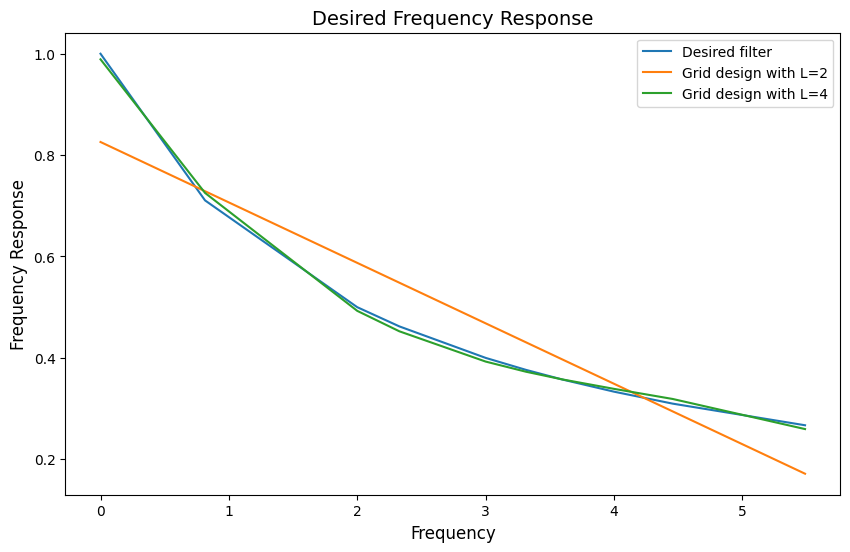

In [43]:
from pytspl.filters import EdgeFlowDenoising
import matplotlib.pyplot as plt
from pytspl.decomposition.eigendecomposition import get_eigendecomposition

    
efd = EdgeFlowDenoising(simplicial_complex=sc)
efd.denoise(f=f, f_true=f0, p_choice="L1")
efd.plot_desired_frequency_response(p_choice="L1")

_, eigenvals = get_eigendecomposition(sc.hodge_laplacian_matrix().toarray())
gbf = GridBasedFilterDesign(sc)
gbf.denoise(f=f, f_true=f0,  L=15, p_choice="L1", mu=0.5)
plt.plot(eigenvals, gbf.history["frequency_responses"][1])
plt.plot(eigenvals, gbf.history["frequency_responses"][3])

plt.legend(["Desired filter", "Grid design with L=2", "Grid design with L=4"])

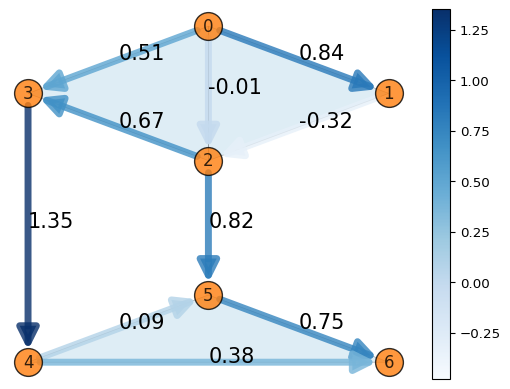

In [12]:
f_est = gbf.history["f_estimated"]
scplot.draw_network(edge_flow=np.round(f_est, 2))

In [13]:
efd.denoise(f=f, f_true=f0, p_choice="L1")
print(efd.history["frequency_responses"])

mu: 0.5, error: 0.7023925539678443
[[1.         0.71064387 0.5        0.46210625 0.4        0.37637086
  0.35726475 0.33333333 0.30971596 0.26708991]]


#### Subcomponent extraction type I - L1 = L2 = L and α = β

Filter size: 0 - Error: 0.48100471770596237
Filter size: 1 - Error: 0.36919330323113225
Filter size: 2 - Error: 0.36919330323113186
Filter size: 3 - Error: 0.38596245251352684


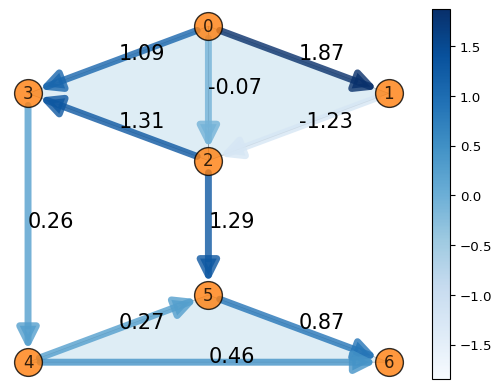

In [12]:
filter_size = 4

gbf.subcomponent_extraction(f=f, f_true=f0, L=filter_size, p_choice="L1", component="gradient")

f_est = gbf.history["f_estimated"]

scplot.draw_network(edge_flow=np.round(f_est, 2))

#### Subcomponent extraction type II - L1 != L2 and α != β

Filter size: 0 - Error: 0.23769437131960866
Filter size: 1 - Error: 0.21331059746413747
Filter size: 2 - Error: 0.18874481232917703
Filter size: 3 - Error: 0.11490116686971008


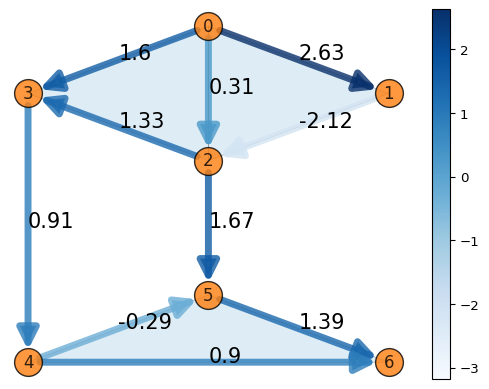

In [14]:
filter_size = 4

f_true = gbf.get_true_signal(f=f, component="gradient")
gbf.subcomponent_extraction(f=f, f_true=f_true,  L=filter_size, p_choice="L1L")

f_est = gbf.history["f_estimated"]

scplot.draw_network(edge_flow=np.round(f_est, 2))

#### General Filter

Filter size: 0 - Error: 1.2568819762196597
Filter size: 0 - Error: 0.9289163381597936


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


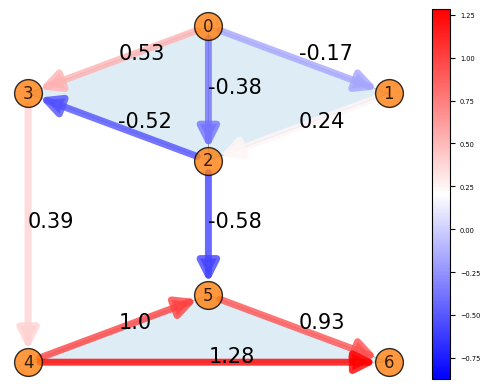

In [12]:

gbf = GridBasedFilterDesign(sc)

f_est_h, f_est_c, f_est_g = gbf.general_filter(
     f=f, f_true=f0, L1 = 1, L2 = 1
)

f_est = f_est_h + f_est_c + f_est_g

scplot.draw_network(edge_flow=np.round(f_est, 2))

In [13]:
gbf.history

{'L1': {'filter': array([[0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3]]),
  'f_estimated': array([-0.05133, -0.11376,  0.15777,  0.0732 , -0.15612, -0.17436,
          0.11589,  0.29856,  0.3831 ,  0.27765]),
  'frequency_responses': array([[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]]),
  'extracted_component_error': array([0.92891634]),
  'filter_error': array([], dtype=float64)},
 'L2': {'filter': array([[0.3, 0. , 0. , 0. , 0. , 0. 